# Illustrative example Dynamic Mode Decomposition

We choose the following dynamic setup
$$
K = \begin{pmatrix} 0.75 & 0.375 & 0 & 0 \\ -0.125 & 0.75 & 0.375 & 0 \\ 0 & -0.125 & 0.75 & 0.375  \\ 0 & 0 & -0.125 & 0.75 \end{pmatrix}
$$
and 
$$
v_1 = \begin{pmatrix} 1 \\ 1 \\ 1 \\ 0 \end{pmatrix}.
$$

Then we introduce the following notation for the snapshot collection (time dependant snapshot)
$$
V_1^N = \{v_1, \cdots, v_N\}
$$

Text(0, 0.5, 'v')

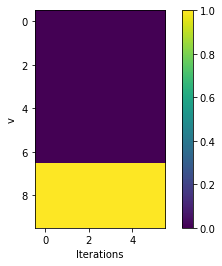

In [7]:
import numpy as np
import pylab as pl

# Dimension
D = 10;

# Dynamic operator
updiag =  0.375;
mddiag =  0.75;
dndiag = -0.125;
# K = dndiag*np.eye(D,k=-1) + mddiag*np.eye(D) + updiag*np.eye(D,k=1);
K = np.eye(D)

# Initial vector
v1= np.zeros([D,1]);
v1[int(D*0.75):,0] = 1;

# Trajectory
v = v1;
V = v1;

N = 5;
for n in range(N):
    v = K@v;
    V = np.concatenate((V,v),axis=1)

# Display
fig = pl.figure()
ax = fig.add_subplot()

pl.imshow(V)
pl.colorbar()
ax.set_xlabel('Iterations')
ax.set_ylabel('v')

## Starter
It is well know that power iteration, under certain conditions, leads to align input vector in the direction 
of the operator dominant mode, \textit{i.e.} the eigenvector associated to the highest eigenvalue (in norm).
With a normalization at each iteration, we have that
\begin{equation}
    \lim_{n\to\infty}\frac{K^nv}{\|K^nv\|} = \phi,
\end{equation}
with
\begin{equation}
    K\phi = \lambda_{\rm max} \phi,
\end{equation}
and where $\lambda_{\rm max}$ is the highest eigenvalue of $A$ (in norm).
It follows that
\begin{equation}
    v_n = a_1 v_1 + \dots + a_{n-1}v_{n-1} + r_n = V_1^{n-1}a + r_n,
\end{equation}
where 
\begin{equation}
    \lim_{n\to\infty}r_n = 0.
\end{equation}
Using the previous equation and the dynamic matrix $K$ defined before, we can write
\begin{equation}
    KV_1^{n-1} = V_2^{n} = V_1^{n-1}S + r_ne_{n-1}^t,
\end{equation}
with
\begin{equation}
    S = \begin{pmatrix}
    0 &   &        &   & a_1 \\
    1 &   &        &   & a_2 \\
      & 1 &        &   & a_3 \\
      &   & \ddots &   & \vdots \\
      &   &        & 1 & a_{n-1}
    \end{pmatrix}.
\end{equation}

Text(0, 0.5, '$\\|v_n - \\pi_{V_1^{n-1}}v_n\\|$')

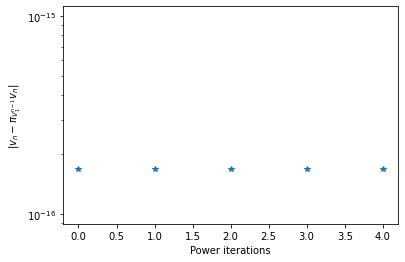

In [19]:
# Trajectory
v  =  np.random.random([D,1]);
v  /= np.linalg.norm(v); 
VN = v;
R  = [];

NN = 5;
for n in range(NN):
    v = K@v;
    R.append(np.abs(np.linalg.norm(v - VN@(VN.T@v))))
    w  = v - VN@(VN.T@v);
    if np.linalg.norm(w) <= 1e-15:
        w *= 0
    else:
        w /= np.linalg.norm(w);
    VN = np.concatenate((VN,w),axis=1);

# Display
fig = pl.figure()
ax = fig.add_subplot()

pl.semilogy(range(NN),R,'*')
ax.set_xlabel('Power iterations')
ax.set_ylabel('$\|v_n - \pi_{V_1^{n-1}}v_n\|$')

## Naive non-stable approach

Assuming that $N$ is large enough to get $r_N<\epsilon$, we can neglect the rest to obtain
\begin{equation}
    KV_1^{N-1} \simeq V_1^{N-1}S,
\end{equation}
with $K\in\in\mathbb{R}^{d\times d}$ and $S\in\mathbb{R}^{N-1 \times N-1}$.
We remark that in general $N-1\ll d$.
Invoking the QR-decomposition of $V_1^{N-1}$, we have that 
\begin{align}
    v_N &= V_1^{N-1}a = QRa \\
    \Rightarrow \quad a &= R^\dagger Q^* v_N,
\end{align}
which allows to build $S$ explicitly and to compute its eigen decomposition, \textit{i.e.} find 
$\Lambda$ diagonal and $Y$ invertible such that 
\begin{equation}
    S = Y \Lambda Y^{-1}. 
\end{equation}
Finally, we obtain 
\begin{align}
    KV_1^{N-1} &= V_1^{N-1}S \\
    &= V_1^{N-1}YLY^{-1} \\
    K \underbrace{V_1^{N-1}Y}_{\Phi} &= \underbrace{V_1^{N-1}Y}_{\Phi} {\Lambda},
\end{align}
and we can compute 
\begin{equation}
    \xi = \Phi^t v_1.
\end{equation}

Expansion coefficients: [0.2 0.2 0.2 0.2 0.2]
Condition number R: 1.3008855753305277e+63
Approximation V2-V1*S: 1.9229626863835638e-16
Approximation V2-K*V1: 0.0


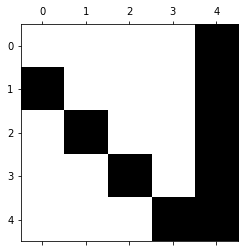

In [22]:
V1 = V[:,0:N]
V2 = V[:,1:(N+1)]
vn = V[:,N]
Q,R = np.linalg.qr(V1)

a = np.linalg.lstsq(R, Q.T@vn, rcond=None);
print("Expansion coefficients:",a[0])
print("Condition number R:", np.linalg.cond(R))

S = np.eye(N,k=-1);
S[:,-1] = a[0];

print("Approximation V2-V1*S:",np.linalg.norm(V2 - V1@S))
print("Approximation V2-K*V1:",np.linalg.norm(V2 - K@V1))
pl.spy(S)

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, -2.22044605e-16+8.32667268e-17j,
       -2.22044605e-16+8.32667268e-17j, -2.22044605e-16+8.32667268e-17j])

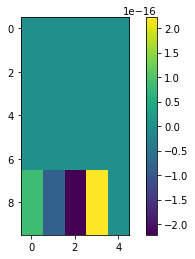

In [27]:
L,Y = np.linalg.eig(S)
# np.linalg.norm(Y@np.diag(L)@np.linalg.inv(Y) - S)

Phi = V1@Y;
C   = np.vander(L,increasing=1);
Xi  = Phi.T@V[:,0]
# Xi = np.linalg.solve( (Y.T@Y)*(C.T@C), )

pl.imshow(np.imag(Phi))
pl.colorbar()
ax.set_xlabel('Iteration')
ax.set_ylabel('v')
#Phi[:,0]

Text(0, 0.5, 'v')

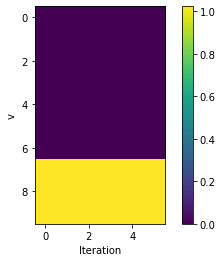

In [29]:
Vd = np.empty([D,0])
# Xi /= 12
for n in range(0,N+1):
    w = np.reshape(Phi@np.diag(L)**n@Xi, [D,1])
    Vd = np.concatenate((Vd,w),axis=1)

fig = pl.figure()
ax = fig.add_subplot()

pl.imshow(np.abs(Vd))
pl.colorbar()
ax.set_xlabel('Iteration')
ax.set_ylabel('v')

## Stable version

$$ AV_1^{N-1} = V_2^{N} = V_1^{N-1} S $$

Using SVD, we get
$$ U\Sigma W = V_1^{N-1}, $$
and injecting into the previous equation
$$ U^t A U = U^t V_2^{N} W \Sigma^{-1} = \tilde{S} $$

In [39]:
V1 = V[:,0:N]
V2 = V[:,1:(N+1)]

U,Sig,W = np.linalg.svd(V1);
Sig_inv = np.zeros([np.shape(V1)[1],np.shape(V1)[0]]);
for i in range(min(np.shape(V1))):
    if Sig[i]>1e-3:
        Sig_inv[i,i] = 1/Sig[i];
St = U.T @ V2 @ W @ Sig_inv

[[0.25819889 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


Text(17.200000000000017, 0.5, 'v')

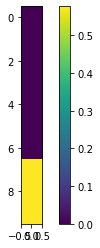

In [50]:
Lt, Xt = np.linalg.eig(St)
idx = Lt.argsort()[::-1]
Lt  = Lt[idx];
Ncut = np.sum(Lt>=1e-6)
Xt  = Xt[:,idx[:Ncut]]

Phi = U@Xt;
C   = np.vander(Lt,increasing=1,N=N);
Sg  = np.zeros([D,N]);
for i in range(N):
    Sg[i,i] = Sig[i]
# Xi  = np.linalg.solve( (Xt.T@Xt)*np.conj(C@C.T), np.conj(np.diag(C@W@Sg.T@Xt)))
Xi  = Phi.T@V[:,0]

pl.imshow(np.abs(Phi))
pl.colorbar()
ax.set_xlabel('Iteration')
ax.set_ylabel('v')

Text(0, 0.5, 'v')

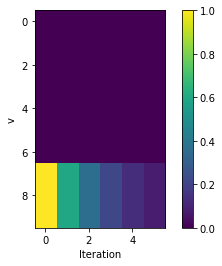

In [52]:
Wd = np.empty([D,0])
for n in range(0,N+1):
    w = np.reshape(Phi@np.diag(Lt[:Ncut])**n@Xi, [D,1])
    Wd = np.concatenate((Wd,w),axis=1)

fig = pl.figure()
ax = fig.add_subplot()

pl.imshow(np.abs(Wd))
pl.colorbar()
ax.set_xlabel('Iteration')
ax.set_ylabel('v')